# Diffraction pattern of an ensemble of particles in solution

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pysingfel as ps

ImportError: No module named pysingfel

## Input parameters 

In [3]:
input_dir='../input'
pdbfile=input_dir+'/pdb/2cex.pdb'
beamfile=input_dir+'/beam/amo86615.beam'
geom=input_dir+'/lcls/amo86615/PNCCD::CalibV1/Camp.0:pnCCD.1/geometry/0-end.data'

## Definition of the experiment

In [4]:
beam = ps.Beam(beamfile)
#SASEbeam = ps.SASEBeam(beam)
increase_factor = 1e2
print('BEFORE: # of photons per pulse {}'.format(beam.get_photons_per_pulse()))
print('>>> Increasing the number of photons per pulse by a factor {}'.format(increase_factor))
beam.set_photons_per_pulse(increase_factor * beam.get_photons_per_pulse())
print('AFTER : # of photons per pulse {}'.format(beam.get_photons_per_pulse()))
det = ps.PnccdDetector(geom=geom, beam=beam)
increase_factor = -0.5
print('BEFORE: Detector distance {} m'.format(det.distance))
print('>>> Increasing the distance by a factor {}'.format(increase_factor))
det.distance = increase_factor * det.distance
print('AFTER : Detector distance {} m'.format(det.distance))
particle = ps.Particle()
particle.read_pdb(pdbfile, ff='WK')
print('Number of atoms in particle: {}'.format(particle.get_num_atoms()))

BEFORE: # of photons per pulse 1e+12
>>> Increasing the number of photons per pulse by a factor 100.0
AFTER : # of photons per pulse 1e+14
BEFORE: Detector distance -0.581 m
>>> Increasing the distance by a factor -0.5
AFTER : Detector distance 0.2905 m
('Unknown element or wrong line: \n', 'HETATM 2364 ZN    ZN A1306      16.516   1.920  -2.897  0.50 39.31          ZN  \n')
no symmetry REMARK 350 found
Number of atoms in particle: 2451


In [15]:
experiment = ps.FXSExperiment(det, beam, [particle], 100)

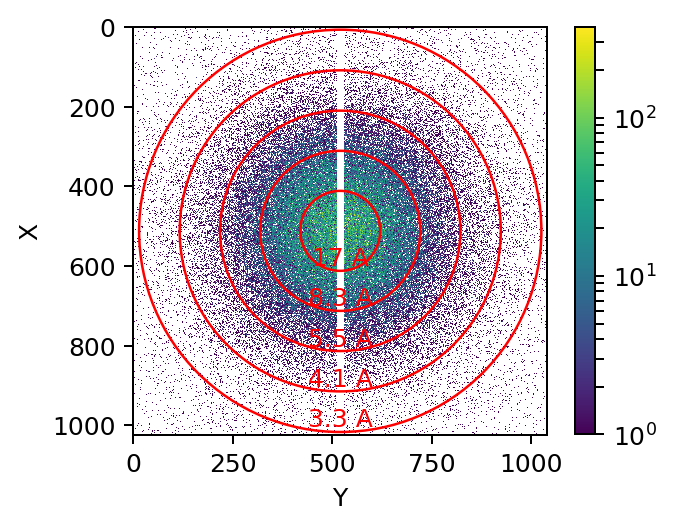

In [16]:
image = experiment.generate_image()
fig = plt.figure(figsize=(4,3), dpi=180)
viz = ps.Visualizer(experiment, diffraction_rings="auto", log_scale=True)
viz.imshow(image)

[1.0] It took 3.82 seconds to finish SPI calculation.
[10.0] It took 14.61 seconds to finish SPI calculation.
[100.0] It took 102.22 seconds to finish SPI calculation.


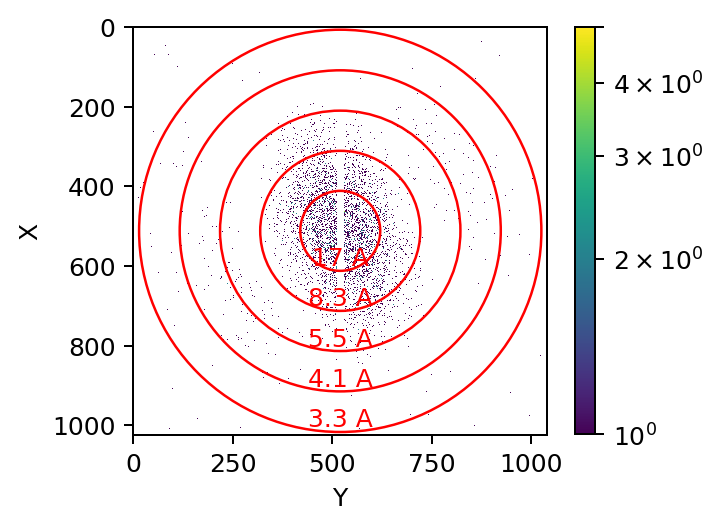

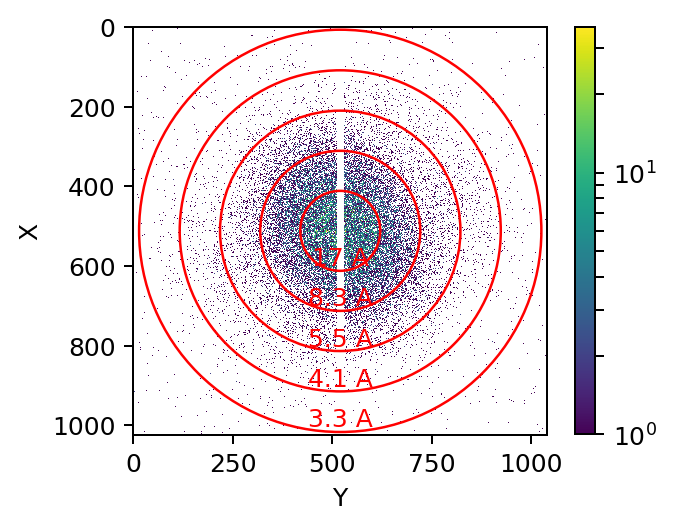

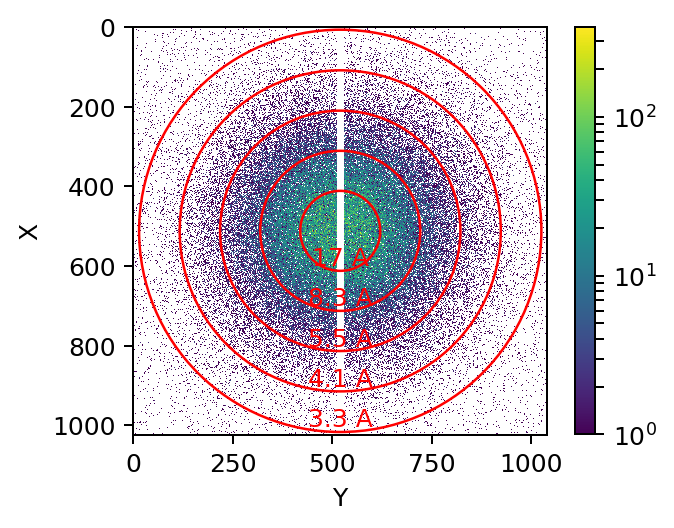

In [19]:
for n in [1., 10., 100.]:
    tic = time.time()
    experiment = ps.FXSExperiment(det, beam, [particle], n)
    image = experiment.generate_image()
    toc = time.time()
    print("[{}] It took {:.2f} seconds to finish FXS calculation.".format(n, toc-tic))
    fig = plt.figure(figsize=(4,3), dpi=180)
    viz = ps.Visualizer(experiment, diffraction_rings="auto", log_scale=True)
    viz.imshow(image)

## Add contribution from bulk

In [11]:
particle.create_masks()

In [12]:
particle.in_vacuo = False

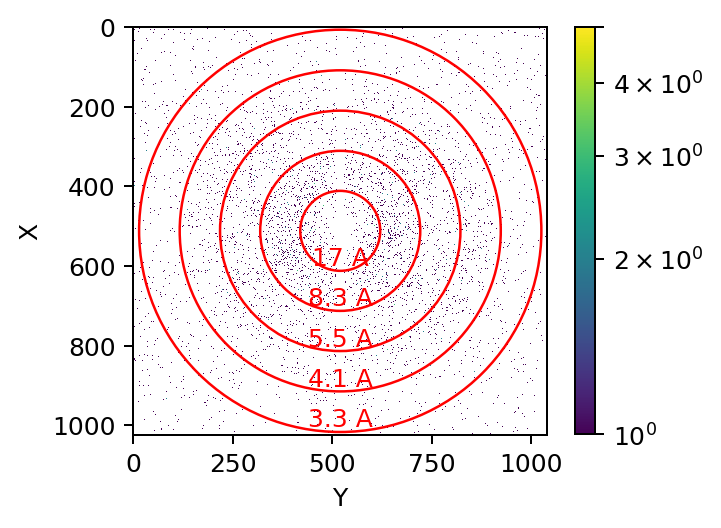

In [13]:
experiment = ps.FXSExperiment(det, beam, [particle], 100)
image = experiment.generate_image()
fig = plt.figure(figsize=(4,3), dpi=180)
viz = ps.Visualizer(experiment, diffraction_rings="auto", log_scale=True)
viz.imshow(image)

In [14]:
particle.in_vacuo = True

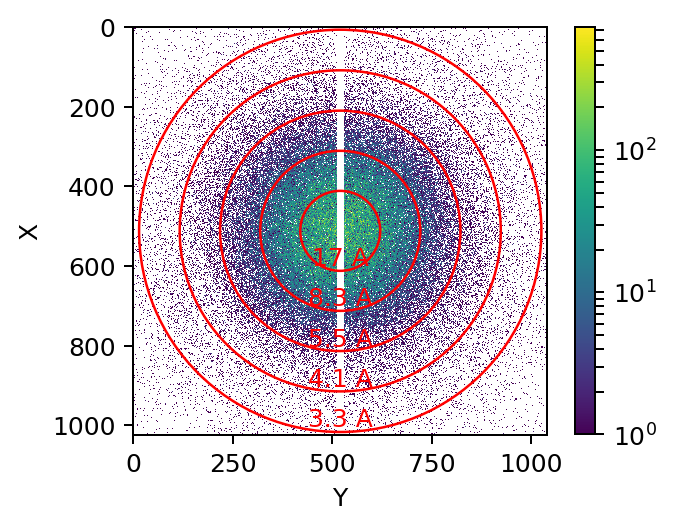

In [15]:
experiment = ps.FXSExperiment(det, beam, [particle], 100)
image = experiment.generate_image()
fig = plt.figure(figsize=(4,3), dpi=180)
viz = ps.Visualizer(experiment, diffraction_rings="auto", log_scale=True)
viz.imshow(image)

## Illustrate with SAXS profile

In [16]:
N = 1000000           # number of particles
resmax = 2. / 10**10  # max. resolution in meters
#
particle.in_vacuo = False
saxs_wet = ps.SAXS(particle, N, resmax)
q_wet, I_wet = saxs_wet.compute()
#
particle.in_vacuo = True
saxs_dry = ps.SAXS(particle, N, resmax)
q_dry, I_dry = saxs_dry.compute()

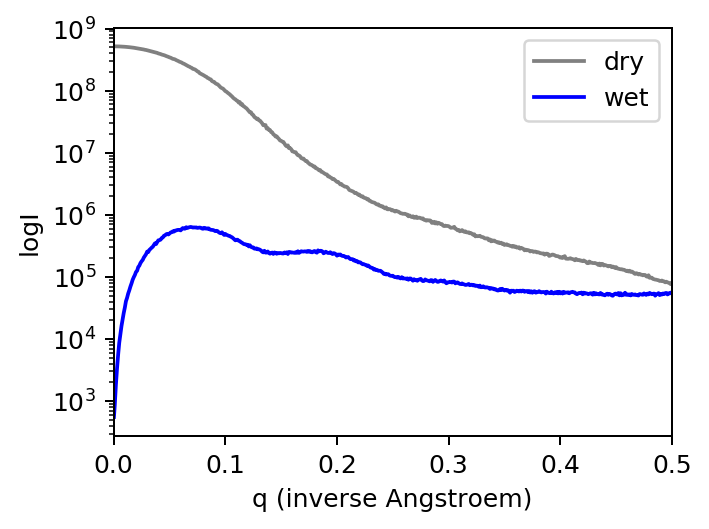

In [17]:
fig = plt.figure(figsize=(4,3),dpi=180)
plt.yscale('log')
plt.xlim(0,q_dry[-1]/10**10)
plt.xlabel('q (inverse Angstroem)')
plt.ylabel('logI')
plt.plot(q_dry/10**10, I_dry, color='grey', label='dry')
plt.plot(q_wet/10**10, I_wet, color='blue', label='wet')
plt.legend()
plt.show()